## Predict if customer will take a personal loan or not

In [1]:
#preprocessing

import numpy as np
import pandas as pd

dfn = pd.read_csv('dataset_bank.csv')

In [2]:
dfn

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Clean the dataset

In [3]:
#drop columns with too many 'unknown' values
#drop contact and poutcome

dfn.drop(['contact', 'poutcome'], axis='columns', inplace=True)

In [4]:
##after doing filter based feature selection in Azure Machine Learning Studio, the highest 7 features were selected
#drop columns that aren't required

dfn.drop([ 'marital', 'housing', 'duration', 'age', 'previous','pdays','day', 'campaign'], axis='columns', inplace=True)

In [5]:
dfn

,job,education,default,balance,loan,month,y
0,management,tertiary,no,2143,no,may,no
1,technician,secondary,no,29,no,may,no
2,entrepreneur,secondary,no,2,yes,may,no
3,blue-collar,unknown,no,1506,no,may,no
4,unknown,unknown,no,1,no,may,no
...,...,...,...,...,...,...,...
45206,technician,tertiary,no,825,no,nov,yes
45207,retired,primary,no,1729,no,nov,yes
45208,retired,secondary,no,5715,no,nov,yes
45209,blue-collar,secondary,no,668,no,nov,no


In [6]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   education  45211 non-null  object
 2   default    45211 non-null  object
 3   balance    45211 non-null  int64 
 4   loan       45211 non-null  object
 5   month      45211 non-null  object
 6   y          45211 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.4+ MB


In [7]:
#change prediction column name

dfn.rename(columns={'y':'ifCreatedAccount'},inplace=True)
dfn

,job,education,default,balance,loan,month,ifCreatedAccount
0,management,tertiary,no,2143,no,may,no
1,technician,secondary,no,29,no,may,no
2,entrepreneur,secondary,no,2,yes,may,no
3,blue-collar,unknown,no,1506,no,may,no
4,unknown,unknown,no,1,no,may,no
...,...,...,...,...,...,...,...
45206,technician,tertiary,no,825,no,nov,yes
45207,retired,primary,no,1729,no,nov,yes
45208,retired,secondary,no,5715,no,nov,yes
45209,blue-collar,secondary,no,668,no,nov,no


In [8]:
#change yes = 1 no = 0
#give values to each job and each month from 1 to 12

dfn['ifCreatedAccount'] = dfn['ifCreatedAccount'].map({'yes': 1, 'no': 0})
dfn['month'] = dfn['month'].map({'jan': 1, 'feb': 2,'mar':3,'apr': 4,'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9,'oct':10,'nov': 11,'dec': 12})
dfn['default'] = dfn['default'].map({'yes': 1, 'no': 0})
dfn['job'] = dfn['job'].map({'blue-collar': 1, 'management': 2,'technician':3,'admin.': 4,'services': 5, 'retired': 6, 'self-employed': 7, 'entrepreneur': 8, 'unemployed': 9,'housemaid':10,'student': 11,'unknown': 12})
dfn['loan'] = dfn['loan'].map({'yes': 1, 'no': 0})
dfn['education'] = dfn['education'].map({'primary': 1, 'secondary': 2, 'tertiary': 3,'unknown': 0})
dfn

,job,education,default,balance,loan,month,ifCreatedAccount
0,2,3,0,2143,0,5,0
1,3,2,0,29,0,5,0
2,8,2,0,2,1,5,0
3,1,0,0,1506,0,5,0
4,12,0,0,1,0,5,0
...,...,...,...,...,...,...,...
45206,3,3,0,825,0,11,1
45207,6,1,0,1729,0,11,1
45208,6,2,0,5715,0,11,1
45209,1,2,0,668,0,11,0


In [9]:
#final dataset after cleaning

dfn . to_csv("PLcleanedBankDataset_loan.csv", index=False)

In [10]:
dataframe = pd.read_csv('PLcleanedBankDataset_loan.csv')
dataframe

,job,education,default,balance,loan,month,ifCreatedAccount
0,2,3,0,2143,0,5,0
1,3,2,0,29,0,5,0
2,8,2,0,2,1,5,0
3,1,0,0,1506,0,5,0
4,12,0,0,1,0,5,0
...,...,...,...,...,...,...,...
45206,3,3,0,825,0,11,1
45207,6,1,0,1729,0,11,1
45208,6,2,0,5715,0,11,1
45209,1,2,0,668,0,11,0


In [11]:
cols = dataframe.columns.tolist()
cols

['job', 'education', 'default', 'balance', 'loan', 'month', 'ifCreatedAccount']

In [12]:
#dataframe = dataframe[cols]
#dataframe
dataframe = dataframe[['education', 'job', 'month','default','balance','ifCreatedAccount','loan']]
cols = list(dataframe.columns.values)
dataframe

,education,job,month,default,balance,ifCreatedAccount,loan
0,3,2,5,0,2143,0,0
1,2,3,5,0,29,0,0
2,2,8,5,0,2,0,1
3,0,1,5,0,1506,0,0
4,0,12,5,0,1,0,0
...,...,...,...,...,...,...,...
45206,3,3,11,0,825,1,0
45207,1,6,11,0,1729,1,0
45208,2,6,11,0,5715,1,0
45209,2,1,11,0,668,0,0


### Creating Models

In [13]:
### Independent and Dependent features
X=dataframe.iloc[:,:-1]
y=dataframe.iloc[:,-1]

In [14]:
X.head()

,education,job,month,default,balance,ifCreatedAccount
0,3,2,5,0,2143,0
1,2,3,5,0,29,0
2,2,8,5,0,2,0
3,0,1,5,0,1506,0
4,0,12,5,0,1,0


In [15]:
y.tail()

45206    0
45207    0
45208    0
45209    0
45210    0
Name: loan, dtype: int64

In [16]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
# Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
RFclassifier=RandomForestClassifier()
RFclassifier.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
# Prediction
y_pred=RFclassifier.predict(X_test)

In [20]:
# Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.7842081981716308

In [21]:
# Create a Pickle file using serialization for Random Forest Classifier
import pickle
pickle_out = open("PL_RandomForestclassifier.pkl","wb")
pickle.dump(RFclassifier, pickle_out)
pickle_out.close()

In [22]:
#Implement Gaussian Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB

NBclassifier = GaussianNB()
NBclassifier.fit(X_train,y_train)

GaussianNB()

In [23]:
NBy_pred=NBclassifier.predict(X_test)

In [24]:
#checking accuracy
NBscore=accuracy_score(y_test,NBy_pred)
NBscore

0.836773813034503

In [25]:
#Implement Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
DTy_pred=DTclassifier.predict(X_test)

In [27]:
#checking accuracy
DTscore=accuracy_score(y_test,DTy_pred)
DTscore

0.7715275729873193

In [28]:
DT_pickle_out = open("PL_DecisionTreeClassifier.pkl","wb")
pickle.dump(DTclassifier, DT_pickle_out)
DT_pickle_out.close()

In [29]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [30]:

KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(X_train,y_train)

KNeighborsClassifier()

In [31]:

KNNy_pred=KNNclassifier.predict(X_test)

In [32]:
#checking accuracy
KNNscore=accuracy_score(y_test,KNNy_pred)
KNNscore

0.8140666470067827

In [33]:

KNN_pickle_out = open("PL_KNNClassifier.pkl","wb")
pickle.dump(KNNclassifier, KNN_pickle_out)
KNN_pickle_out.close()

### Analysing data using graphs

In [34]:
dataframe['loan'].value_counts()

0    37967
1     7244
Name: loan, dtype: int64

Text(0.5, 0, 'Taken personal loan or not')

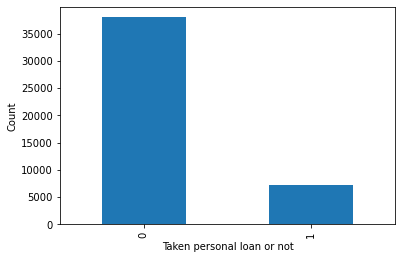

In [35]:
# Plot of Count
import matplotlib.pyplot as plt


dataframe['loan'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Taken personal loan or not')

#### Scatter plot

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#get random values to plot a neat graph
DGraph = dataframe.sample(n = 200, random_state = 2)

<AxesSubplot:xlabel='job', ylabel='month'>

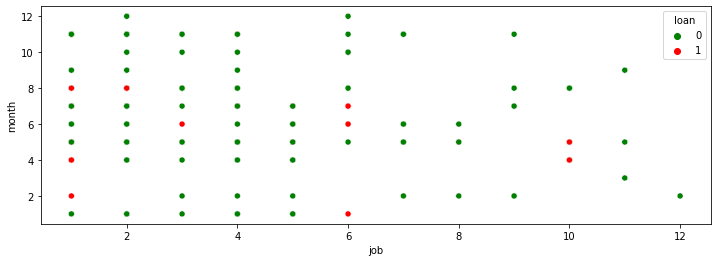

In [38]:
fig,ax = plt.subplots(figsize=(12,4))
sns.scatterplot(x=DGraph['job'],y=DGraph['month'],hue=DGraph['loan'],palette=['green','red'],data=DGraph)

#### Bar charts

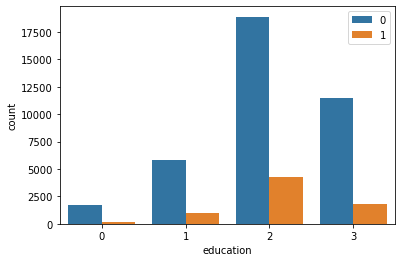

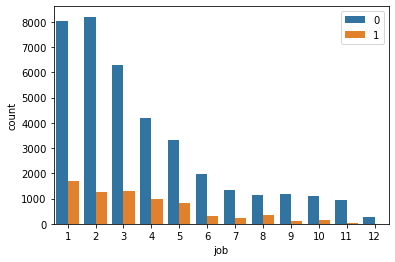

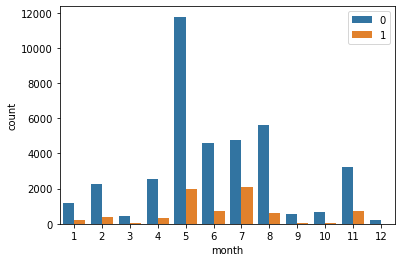

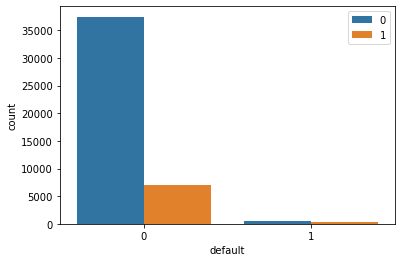

In [39]:
graphs=["education","job","month","default"]

y1 = dataframe['loan']
y1 = y1.values



for i in graphs:
    
    sns.countplot(x=i, hue=y1, data=dataframe)
    plt.show()

### conclusions
+ more people with secondary education take personal loans compared to others
+ more customers with blue colloar jobs have taken loans
